In [4]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
print ( df.shape)
print(df.head(3))

(200, 5)
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3


In [5]:
df_radio = df [["radio","sales"]]
df_radio.head(3)

,radio,sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3


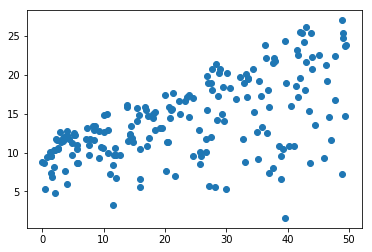

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter(df_radio.radio,df_radio.sales)

In [7]:
# pred_sales = w1 * radio + b 
def predict_sales (radio,weight,bias):
    pred_radio = weight*radio + bias
    return pred_radio
    

In [8]:
w1,b1= [0.46, 0.0249]
w2,b2= [0.7, 0.3]
w3,b3= [0.3, -0.2]
y1 = predict_sales(df_radio.radio,w1,b1)
y2 = predict_sales(df_radio.radio,w2,b2)
y3 = predict_sales(df_radio.radio,w3,b3)

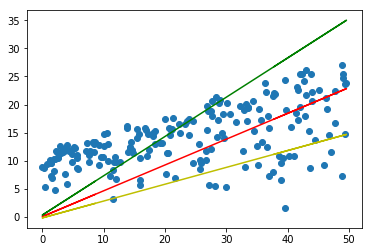

In [9]:
plt.scatter(df.radio,df_radio.sales)
plt.plot(df.radio,y1,c='r')
plt.plot(df.radio,y2,c='g')
plt.plot(df.radio,y3,c='y')

In [10]:
def cost_function(true_label,predicted):
    error = sum((true_label - predicted)**2)/len(true_label)
    return error   

In [11]:
print(cost_function(df_radio.sales,y1))
print(cost_function(df_radio.sales,y2))
print(cost_function(df_radio.sales,y3))

43.50020310200002
78.94315699999997
72.64293700000003


In [12]:
def update_weights(feature,true_label,weight,biase,learning_rate):
    de_dw =  (-2)/len(true_label)*sum((true_label-weight*feature-biase)* feature)
    de_db =  (-2)/len(true_label)*sum(true_label-weight*feature-biase)
    weight = weight -learning_rate * de_dw
    biase = biase -learning_rate * de_db
    return weight,biase

In [13]:
update_weights(df_radio.radio,df_radio.sales,0.2,0.1,0.001)

(0.63239538, 0.1185394)

In [14]:
def train(feature,true_label,weight,biase,alpha,iters):
    cost_history = []
    for i in range(iters):
        weight,biase = update_weights(feature,true_label,weight,biase,alpha)
        predictions = predict_sales(feature,weight,biase)
        cost = cost_function(true_label,predictions)
        cost_history.append(cost)   
    return weight,biase,cost_history

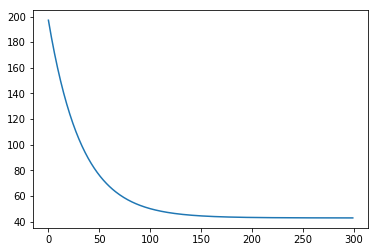

In [15]:
w,b,c = train(df_radio.radio,df_radio.sales,0.03,0.01,0.00001,300)
plt.plot(c)
###y is cost , x is iteration

In [16]:
w,b

(0.48163260395796464, 0.03987666479914223)

In [17]:
# def train(feature,true_label,weight,biase,alpha,iters):
#     cost_history = []
#     weight_history = []
#     biase_history = []
#     for i in range(iters):
#         weight,biase = update_weights(feature,true_label,weight,biase,alpha)
#         predictions = predict_sales(feature,weight,biase)
#         cost = cost_function(true_label,predictions)
#         cost_history.append(cost) 
#         weight_history.append(weight)
#         biase_history.append(biase)
#         print(weight,biase,cost)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

## many variables, different range, use scaling

In [22]:
x = df[['TV','radio','newspaper']]
####Data Scaling### ##标准化 normalization
scaler = StandardScaler().fit(x)
x_scaled=scaler.transform(x)
print(x_scaled.shape)
print(np.mean(x_scaled, axis=0))
print(np.std(x_scaled, axis=0))

(200, 3)
[ 1.22124533e-16 -4.52970994e-16  2.22044605e-16]
[1. 1. 1.]


In [20]:
mod = LinearRegression().fit(x_scaled,df.sales)
print('coeffs are ', mod.coef_)
print('bias is ', mod.intercept_)

coeffs are  [ 3.91925365  2.79206274 -0.02253861]
bias is  14.0225


In [ ]:
###